# 1. Import the necessary libraries.

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

# 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [7]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

# 3. First look at its main features (head, shape, info).



In [9]:
display(data.shape)
data.head()

(9134, 24)

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   
3                            65                         0                   7   
4                            44                         0                   1   

      Policy Type        Policy  Renew Offer Type  Sales Channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   
3  Corporate Auto  Corporate L2            Offer1    Call Center   
4   Personal Auto   Personal L1            Offer1          Agent   

  Total Claim Amount  Vehicle Class Vehicle Size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  

[5 rows x 24 columns]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

# 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)



In [37]:
columns2 = []
for col in data.columns:
    columns2.append(re.sub(" ","_", col).lower())
data.columns = columns2
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

# 5. Change effective to date column to datetime format.



In [44]:
data['effective_to_date'] = data['effective_to_date'].apply(lambda x: pd.to_datetime(x))

# 6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df



In [77]:
numericals = data.select_dtypes(np.number)
numericals.head()

customer_lifetime_value  income  monthly_premium_auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   months_since_last_claim  months_since_policy_inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   number_of_open_complaints  number_of_policies  total_claim_amount  
0                          0                   1          384.811147  
1                          0                   8         1131.464935  
2                          0                   2          566.472247  
3                          0                   7          529.881344  
4                          0                   1          138.130879

In [119]:
def Is_discrete(x,th):  
    if x.unique().shape[0] < th:
        is_discrete = True
    else:
        is_discrete = False
    return is_discrete

discrete_columns = []
continuous_columns = []

for col in numericals.columns:
    if Is_discrete(numericals[col],200):
        discrete_columns.append(col)
    else:
        continuous_columns.append(col)

    
print(discrete_columns)
print(continuous_columns)

['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']
['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']


In [120]:
continuous_df = numericals[continuous_columns]
discrete_df = numericals[discrete_columns]

# 7. Plot a correlation matrix, comment what you see.



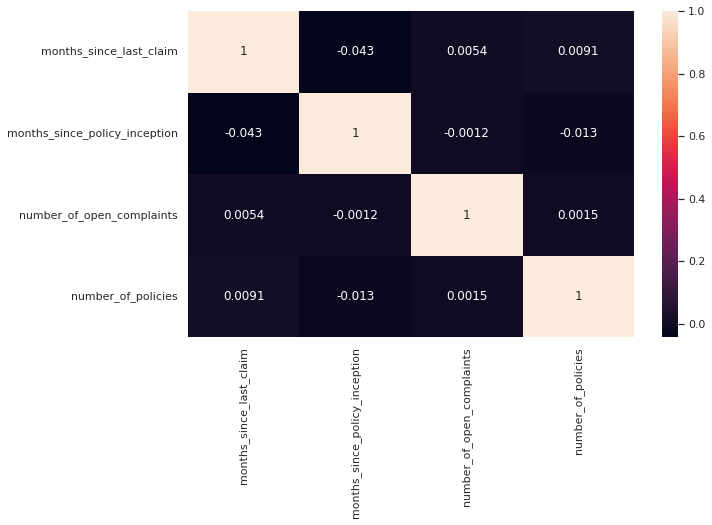

In [121]:
# We show the heatmap in order to see correlations
sns.set(rc={'figure.figsize':(10,6)})
correlations_matrix = discrete_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

I do not see correlation between them

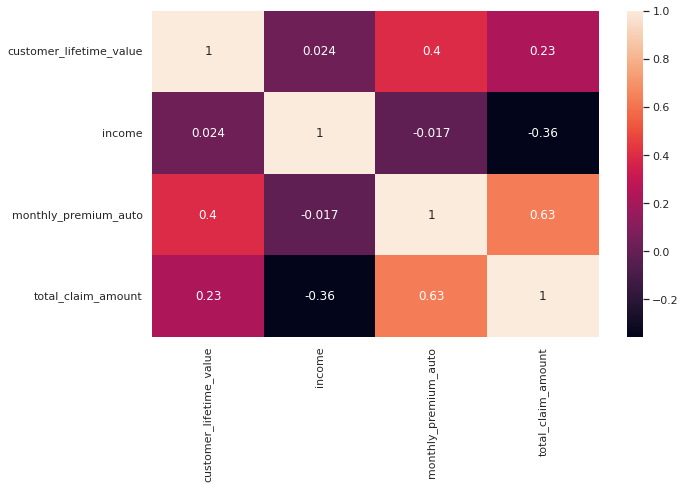

In [122]:
# We show the heatmap in order to see correlations
sns.set(rc={'figure.figsize':(10,6)})
correlations_matrix = continuous_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

I see good correlation between total_claim_amount and monthy_premium_auto, also a little correlation with income and customer_lifetime_value.

# 8. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)



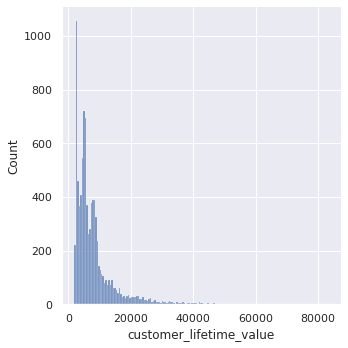

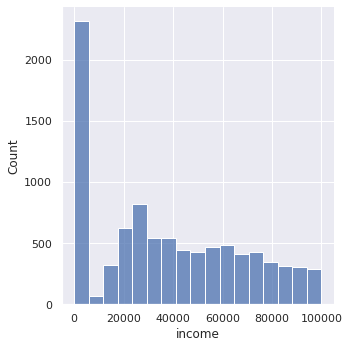

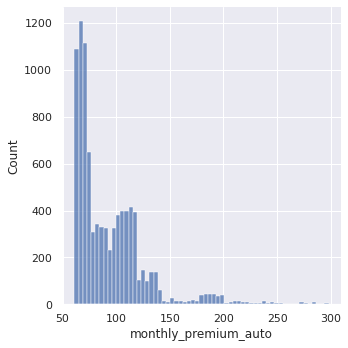

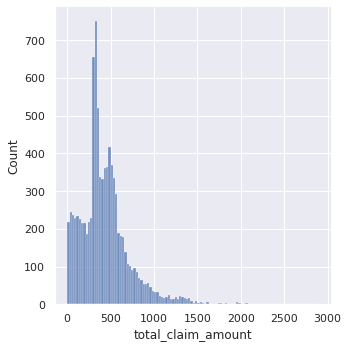

In [123]:
for col in continuous_df.columns:
    sns.displot(x=col,data=continuous_df)
    plt.show()

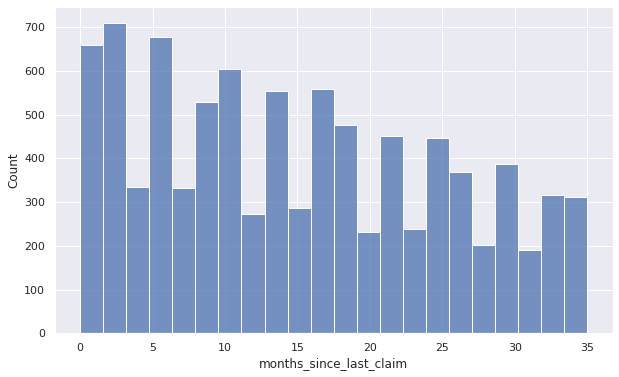

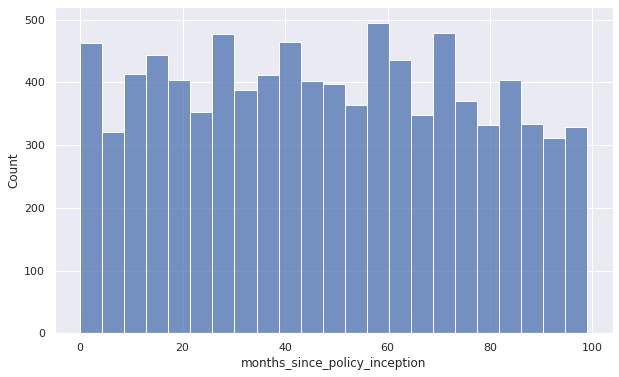

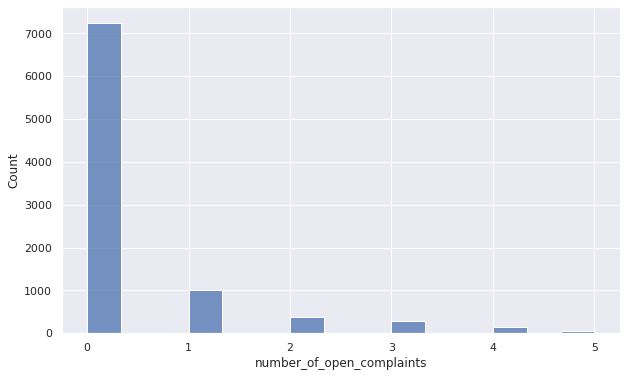

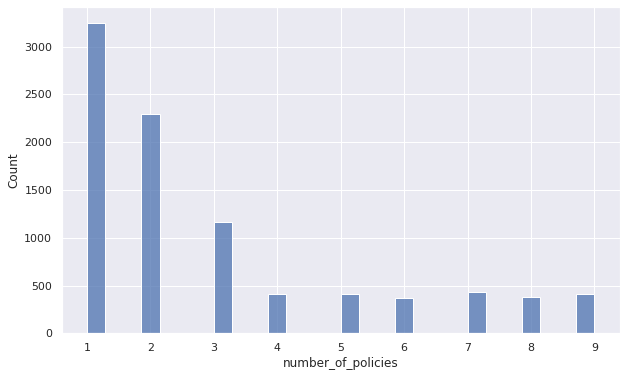

In [124]:
for col in discrete_df.columns:
    sns.histplot(x=col,data=discrete_df)
    plt.show()

#  9. Comment what you can see in the plots.



I can see positively skewed graphs on the continuous graphs

# 10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)



In [129]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
scaler.fit(continuous_df) # Remember that at this point X_income contains the numerical feature except ['INCOME','TIMELAG','AVGGIFT']
X_normalized_np = scaler.transform(continuous_df)
X_normalized_df = pd.DataFrame(X_normalized_np, columns=continuous_df.columns)
X_normalized_df


customer_lifetime_value    income  monthly_premium_auto  \
0                   -1.394947  0.691719             -0.850901   
1                    0.271651 -1.641026              0.433173   
2                    1.114847  0.596805              0.847014   
3                    0.408620 -1.641026              0.796044   
4                   -1.357236  0.528534             -0.572139   
...                       ...       ...                   ...   
9129                 1.780246  0.863520             -0.572139   
9130                -1.160398  0.122833             -0.217718   
9131                 0.504458 -1.641026              0.076464   
9132                 0.384885  0.130888              0.501425   
9133                -1.514795 -1.641026             -0.328367   

      total_claim_amount  
0               0.006373  
1               1.988152  
2               0.604891  
3               0.493624  
4              -1.141342  
...                  ...  
9129           -0.798069  
9130           -0.014291  
9131            1.216094  
9132            0.957931  
9133           -0.050024  

[9134 rows x 4 columns]

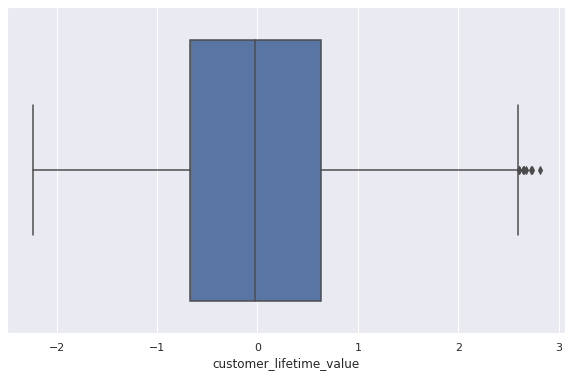

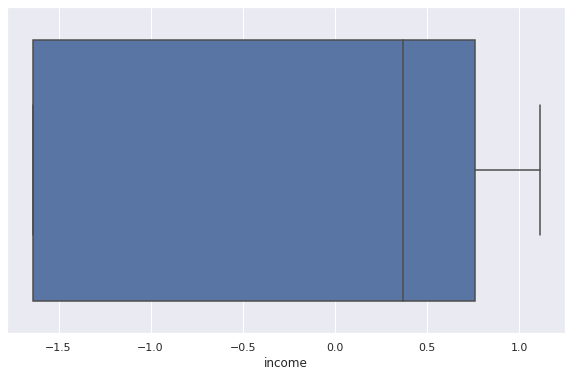

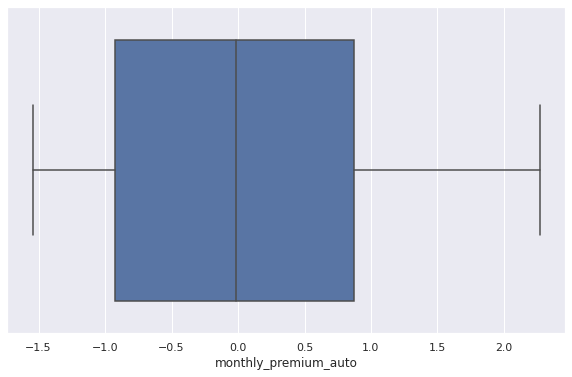

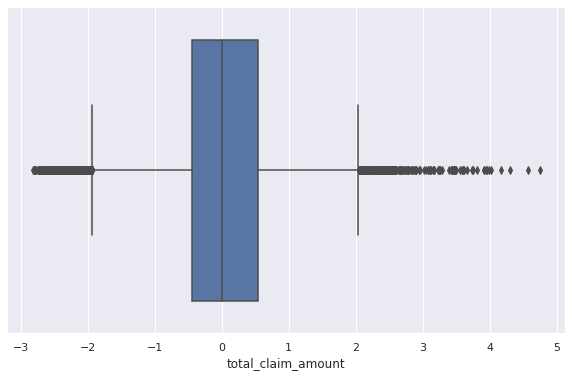

In [132]:
for col in X_normalized_df.columns:
    sns.boxplot(x=col,data=X_normalized_df)
    plt.show()

In [134]:
# Maybe we can remove outlayers on the cstomer_lifetime_value and total_claim_amount

In [143]:
# Checking how many values will be removed if the outliers are removed
iqr = np.nanpercentile(X_normalized_df['total_claim_amount'],75) - np.nanpercentile(X_normalized_df['total_claim_amount'],25)
upper_limit = np.nanpercentile(X_normalized_df['total_claim_amount'],75) + 2*iqr
print(upper_limit)

extraordinary_points = X_normalized_df[X_normalized_df['total_claim_amount'] > upper_limit]
print(len(extraordinary_points)) # This checks the number of points that will be removed
print("Percentage is:",round(len(extraordinary_points)/len(data)*100,2),"%")  

X_outliers_dropped = X_normalized_df[X_normalized_df['total_claim_amount'] <= upper_limit].copy()

2.532051616069424
91
Percentage is: 1.0 %


In [149]:
# Same for clv...
iqr = np.nanpercentile(X_outliers_dropped['customer_lifetime_value'],75) - np.nanpercentile(X_outliers_dropped['customer_lifetime_value'],25)
upper_limit = np.nanpercentile(X_outliers_dropped['customer_lifetime_value'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = X_outliers_dropped[X_outliers_dropped['customer_lifetime_value'] > upper_limit]
print(len(extraordinary_points)) # This checks the number of points that will be removed
print("Percentage is:",round(len(extraordinary_points)/len(data)*100,2),"%")  

X_outliers_dropped2 = X_outliers_dropped[X_outliers_dropped['customer_lifetime_value'] <= upper_limit].copy()

2.582826214070824
6
Percentage is: 0.07 %


In [150]:
X_outliers_dropped2

customer_lifetime_value    income  monthly_premium_auto  \
0                   -1.394947  0.691719             -0.850901   
1                    0.271651 -1.641026              0.433173   
2                    1.114847  0.596805              0.847014   
3                    0.408620 -1.641026              0.796044   
4                   -1.357236  0.528534             -0.572139   
...                       ...       ...                   ...   
9129                 1.780246  0.863520             -0.572139   
9130                -1.160398  0.122833             -0.217718   
9131                 0.504458 -1.641026              0.076464   
9132                 0.384885  0.130888              0.501425   
9133                -1.514795 -1.641026             -0.328367   

      total_claim_amount  
0               0.006373  
1               1.988152  
2               0.604891  
3               0.493624  
4              -1.141342  
...                  ...  
9129           -0.798069  
9130           -0.014291  
9131            1.216094  
9132            0.957931  
9133           -0.050024  

[9037 rows x 4 columns]

# 11. Did you find outliers? Comment what you will do with them.



Found some outlayers and dropped them

# 12. Check all columns for NaN values. Decide what (if anything) you will need to do with them 

In [154]:
continuous_df = X_outliers_dropped2.copy()
continuous_df.isna().sum()

customer_lifetime_value    0
income                     0
monthly_premium_auto       0
total_claim_amount         0
dtype: int64

In [155]:
discrete_df.isna().sum()

months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
dtype: int64

I did not find any NaN values